<h1 align=center><font size = 6><b>Zelando's MNIST-like apparel classification project</b></font></h1>

# <span style="color:#FFFFFF; font-size: 1%;">INTRODUCTION</span>
<div style="padding: 35px;color:white;margin:1;font-size:220%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.freepik.com/premium-photo/different-clothes-wardrobe_203337-634.jpg?w=1800)"><b><span style='color:white'>INTRODUCTION </span></b> </div>

## <b>I <span style='color:#0071ff'>|</span> Preface 🚀</b> 

In this project we take the MNIST-like database of Zelando (source: https://www.kaggle.com/datasets/zalando-research/fashionmnist), consisting of 70,000 articles of clothing, of 10 different lables:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Boot
    
The images are all 28x28 (784 pixels in total) grayscale images.

This project would use a convolution neural network (CNN) to classify the clothes' labels.

<center><img src='https://img.freepik.com/premium-photo/low-angle-back-view-unrecognizable-female-picking-outfit-hanging-rail-with-different-clothes-closet_126745-3088.jpg' height=270px width=600px></center>


### License

The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
Usability

8.53
License

Other (specified in description)
Expected update frequency

Not specified
Tags

## <b>II <span style='color:#0071ff'>|</span> Import libraries 🕮</b> 

We will be using Keras, with a tensor flow backend here.

In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## <b>III <span style='color:#0071ff'>|</span> Introducing the data 💾</b> 

In [2]:
# 70,000 entries of training images
df_train = pd.read_csv('DataTables/fashion-mnist_train.csv')
# 10,000 entries of test images
df_test = pd.read_csv('DataTables/fashion-mnist_test.csv')

In [3]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# <span style="color:#FFFFFF; font-size: 1%;">DATA CHECKS</span>

<div style="padding: 35px;color:white;margin:1;font-size:220%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.freepik.com/premium-photo/different-clothes-wardrobe_203337-634.jpg?w=1800)"><b><span style='color:white'>DATA CHECKS & PREPARATION</span></b> </div>

This data is cleaned and made to be a standard for ML projects. Thus there is very little we need to do for it.

The only needed thing to do here is to convert the pixel intensity values (0 to 255) to float b/w 0 and 1.

In [5]:
df_train['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [6]:
df_test['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [7]:
train_array = np.array(df_train, dtype = 'float32')
test_array = np.array(df_test, dtype = 'float32')

In [8]:
X_train = train_array[:,1:]/255

y_train = train_array[:,0]

X_test = test_array[:,1:]/255

y_test = test_array[:,0]

Create a separate validation set (from the training one)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=16, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (48000, 784) (48000,)
Test set: (10000, 784) (10000,)


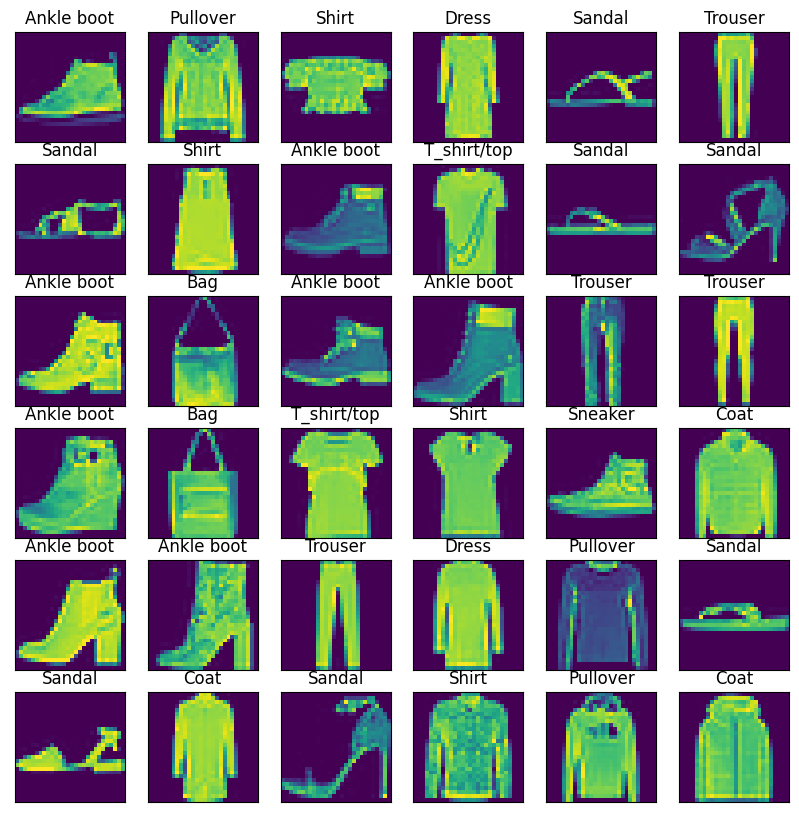

In [10]:
# plot some of the samples
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# <span style="color:#FFFFFF; font-size: 1%;">ML MODEL</span>

<div style="padding: 35px;color:white;margin:1;font-size:220%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.freepik.com/premium-photo/different-clothes-wardrobe_203337-634.jpg?w=1800)"><b><span style='color:white'>ML MODEL</span></b> </div>

## <b>IV <span style='color:#0071ff'>|</span> Formatting 📚</b> 

We shall define the image size and some other hyperparametres here

In [11]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 

In [12]:
# reshaping of the data
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_valid = X_valid.reshape(X_valid.shape[0],*image_shape)

## <b>V <span style='color:#0071ff'>|</span> Model Build 🏗️</b> 

### CNN architecture

* One convolution layer with 32 filters
    * "relu" activation
    * kernel is 3x3
    * we feed the nodes images of size 28x28
* Pooling layer to downsize the image by a factor of 4 (makes the NN run faster)
* Dropout of 0.2 in order to lightly regularize it
* Dense layer of 32 nodes for computing
* Dense layer of 10 nodes for the final classification of the labels

In [13]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

### Training the model

In [16]:
model_history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4800,
    epochs=35,
    verbose=1,
    validation_data=(X_valid,y_valid),
)

Epoch 1/35
10/10 [==============================] - 19s 2s/step - loss: 0.5760 - accuracy: 0.7956 - val_loss: 0.5471 - val_accuracy: 0.8027
Epoch 2/35
10/10 [==============================] - 19s 2s/step - loss: 0.5384 - accuracy: 0.8112 - val_loss: 0.5143 - val_accuracy: 0.8183
Epoch 3/35
10/10 [==============================] - 19s 2s/step - loss: 0.5151 - accuracy: 0.8197 - val_loss: 0.4967 - val_accuracy: 0.8245
Epoch 4/35
10/10 [==============================] - 9782s 1087s/step - loss: 0.4926 - accuracy: 0.8292 - val_loss: 0.4748 - val_accuracy: 0.8313
Epoch 5/35
10/10 [==============================] - 29s 3s/step - loss: 0.4744 - accuracy: 0.8355 - val_loss: 0.4593 - val_accuracy: 0.8357
Epoch 6/35
10/10 [==============================] - 20s 2s/step - loss: 0.4607 - accuracy: 0.8403 - val_loss: 0.4479 - val_accuracy: 0.8395
Epoch 7/35
10/10 [==============================] - 17s 2s/step - loss: 0.4476 - accuracy: 0.8463 - val_loss: 0.4323 - val_accuracy: 0.8467
Epoch 8/35
10/1

## <b>V <span style='color:#0071ff'>|</span> Analysis of the results 📈</b> 

Let us see now how the trained model fairs under the validation and test set test

Text(0.5, 1.0, 'Train - Accuracy')

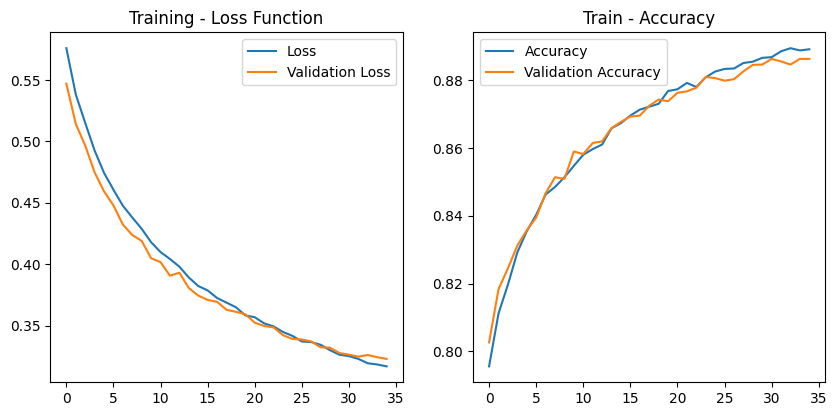

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_history.history['loss'], label='Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(model_history.history['accuracy'], label='Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

The training went well, if the hyper-parameters are tuned and more epoch iterated, there could pehaps be an improvement.
The validation score seems to follow the training one well enough, showing no over or underfit.

In [34]:
from sklearn.metrics import classification_report

predict_x = cnn_model.predict(X_test) 
predicted_classes = np.argmax(predict_x,axis=1)

num_classes = 10
target_names = ["{1} - Class {0}".format(i,class_names[i]) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

313/313 [==============================] - 2s 6ms/step
                       precision    recall  f1-score   support

T_shirt/top - Class 0       0.82      0.88      0.85      1000
    Trouser - Class 1       0.98      0.98      0.98      1000
   Pullover - Class 2       0.80      0.87      0.83      1000
      Dress - Class 3       0.89      0.94      0.91      1000
       Coat - Class 4       0.84      0.86      0.85      1000
     Sandal - Class 5       0.96      0.95      0.96      1000
      Shirt - Class 6       0.79      0.60      0.69      1000
    Sneaker - Class 7       0.94      0.93      0.94      1000
        Bag - Class 8       0.97      0.97      0.97      1000
 Ankle boot - Class 9       0.94      0.96      0.95      1000

             accuracy                           0.89     10000
            macro avg       0.89      0.89      0.89     10000
         weighted avg       0.89      0.89      0.89     10000



Shirt has the lowest f1-score (0.69), and bags and trousers are pretty well classifies (0.97 and 0.98)

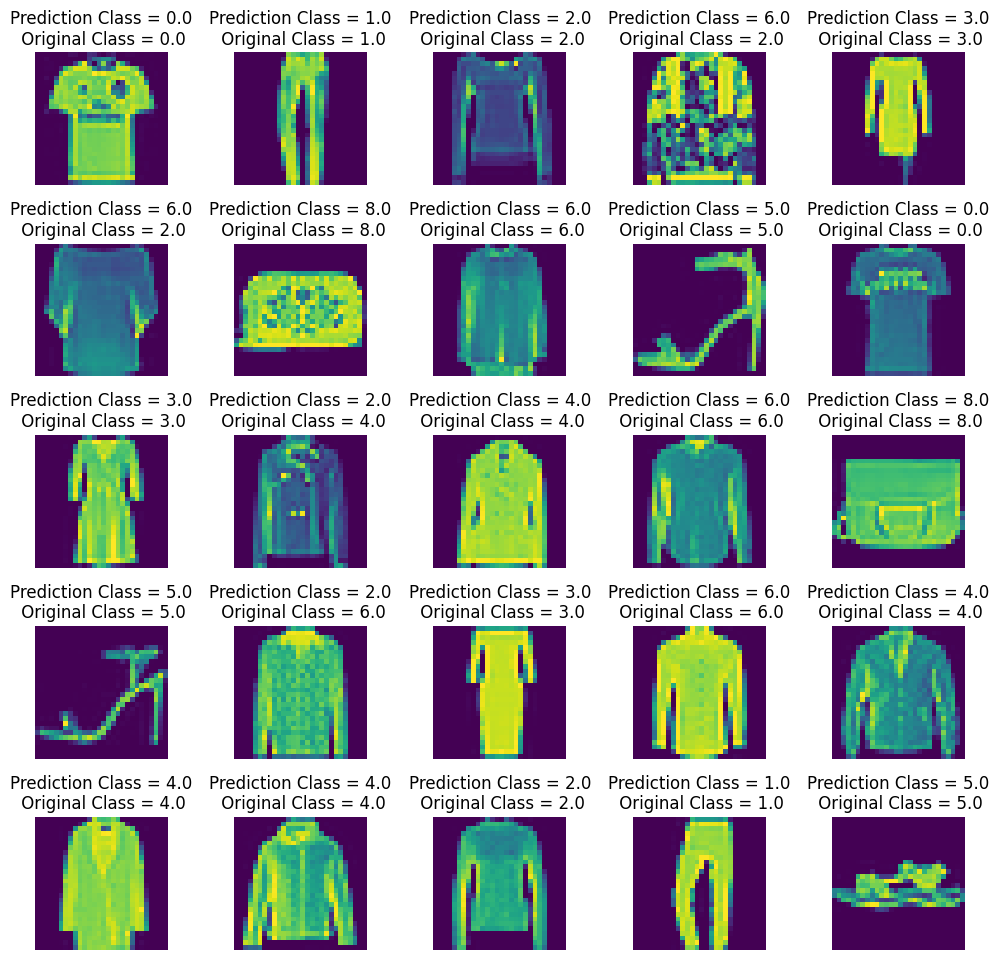

In [38]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# <span style="color:#FFFFFF; font-size: 1%;">CONCLUSION</span>

<div style="padding: 35px;color:white;margin:1;font-size:220%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.freepik.com/premium-photo/different-clothes-wardrobe_203337-634.jpg?w=1800)"><b><span style='color:white'>Conclusion</span></b> </div>

The new Fashion-MNIST set of Zeland is well made and clean. Perfect for Convolutional Neural Network benchmarking.
The model constructed with a CNN works well, though there is some room for improvement. Escpecially in the differentiation b/w pullovers and shirts